### Portfolio of Oil Exploration Assets: Learning Options, Sequential Drilling Options and Defer Options 
####  Marco Antonio Guimarães Dias, 
#### Luigi de Magalhães Detomi Calvette
##### RO Congress - Boston 2017


[Paper](http://www.realoptions.org/openconf2017/data/papers/57.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import time

In [2]:
###Dados de Entrada###
r=np.log(1+0.03)
#print(r)
delta=np.log(1+0.038)
sigma=0.3
tau=3
Po=50


In [3]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_Guy.csv", sep=';')
case.set_index('Type', inplace=True)
case=case.astype(float).T
case

Type,DogFish,Feather,Head
CF,0.30,0.25,0.20
I_w,80.00,60.00,80.00
q,0.15,0.14,0.15
B,450.00,400.00,500.00
Owner,1.00,1.00,0.00


In [4]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_Guy_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,DogFish,Feather,Head
Type,,,
DogFish,1.0,0.6,0.5
Feather,0.6,1.0,0.6
Head,0.5,0.6,1.0


In [5]:
###############Bloco 1####################3


In [6]:
case_b1=pd.read_csv("Case_Guy_b1.csv", sep=';')
case_b1.set_index('Type', inplace=True)
case_b1=case_b1.astype(float).T
case_b1

Type,DogFish,Feather
CF,0.30,0.25
I_w,80.00,60.00
q,0.15,0.14
B,450.00,400.00
Owner,1.00,1.00


In [7]:
case_corr_b1=pd.read_csv("Case_Guy_corr_b1.csv", sep=';')
case_corr_b1.set_index('Type', inplace=True)
case_corr_b1


,DogFish,Feather
Type,,
DogFish,1.0,0.6
Feather,0.6,1.0


In [8]:
###############Bloco 2##########################


In [9]:
def V(P,case,w):
    valor=P*case.iloc[2,k[w]]*case.iloc[3,k[w]]
    return valor

    
    

In [10]:
def I(case,w):
    invest=case.iloc[3,k[w]]*5.35 + 650
    return invest

In [11]:
def VME(P,case,i):
    VPL=P*case.iloc[2,i]*case.iloc[3,i] - (case.iloc[3,i]*5.35 + 650)
    vme=case.iloc[0,i]*VPL - case.iloc[1,i]
    return vme

In [12]:
print(VME(50,case,0))
print(VME(50,case,1))
print(VME(50,case,2))


15.25
-57.499999999999886
5.0


In [13]:
VME(50,case,0)+VME(50,case,1) + VME(50,case,2)

-37.249999999999886

In [14]:
VME(50,case,0)+VME(50,case,1)

-42.249999999999886

In [15]:
#################Formalizacao caso - correto
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
    
    m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
    
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
    print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    


###Fornece o melhor portfolio seq_winner e o valor do porfolio winner

winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

seq_sec=list(seq)
num=np.argmax(fold)
fold_sec=list(fold)
fold_sec.remove(np.amax(fold))
del seq_sec[num]
    
second=np.amax(fold_sec)
Seq_sec=seq_sec[np.argmax(fold_sec)]
second=np.maximum(0,second)
if second==0:
    Seq_sec='W'

diff=winner-second

    
    
            

    #print(fold)
    #print(m)
print('melhor:',Seq_winner, '$melhor:', winner,'segundo:',Seq_sec,'$Segundo:',second,'diff:',diff, fold)
#print(fold)
    
    
    
print(np.argmax(fold))    
    
    

[True, True, True, True]
[True, True, True, True]
[[30.         64.68626967 72.71514427]
 [        nan  7.99159871  9.95020999]
 [        nan         nan 58.53064256]
 [        nan         nan  2.42303146]]
[True, True, True, True]
[True, True, True, True]
[[30.         50.55050463 93.04895105]
 [        nan  6.90692659 35.69208386]
 [        nan         nan 67.72236566]
 [        nan         nan  3.5599476 ]]
[True, True, True, True]
[True, True, True, True]
[[25.         77.6235236  74.62763853]
 [        nan 14.12549213 16.26983941]
 [        nan         nan 35.74712621]
 [        nan         nan  1.2741104 ]]
[True, True, True, True]
[True, True, True, True]
[[25.         61.56921938 94.08695317]
 [        nan  6.14359354 51.24777763]
 [        nan         nan 82.19061805]
 [        nan         nan  9.67012799]]
[True, True, True, True]
[True, True, True, True]
[[20.         75.82575695 91.22689345]
 [        nan 18.54356076 32.21627957]
 [        nan         nan 52.8885573 ]
 [   

In [16]:
seq,seq_sec

([(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)],
 [(0, 1, 2), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)])

In [17]:
fold,fold_sec


([43.637694116977855,
  55.70189340712465,
  30.138107404628684,
  29.530967449841825,
  37.14935566296958,
  26.68858614751098],
 [43.637694116977855,
  30.138107404628684,
  29.530967449841825,
  37.14935566296958,
  26.68858614751098])

In [18]:
num

1

In [19]:
np.argmax(fold)

1

In [20]:
fold

[43.637694116977855,
 55.70189340712465,
 30.138107404628684,
 29.530967449841825,
 37.14935566296958,
 26.68858614751098]

In [28]:
def carteira(case,case_corr,P):
    #################Formalizacao caso 4 - correto
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan


        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)) -case.iloc[1,k[0]]

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'
    
    
    seq_sec=list(seq)
    num=np.argmax(fold)
    fold_sec=list(fold)
    fold_sec.remove(np.amax(fold))
    del seq_sec[num]
    
    second=np.amax(fold_sec)
    Seq_sec=seq_sec[np.argmax(fold_sec)]
    second=np.maximum(0,second)
    if second==0:
        Seq_sec='W'
    diff=winner-second



        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,Seq_sec, second, diff,fold]







In [29]:
cart=carteira(case,case_corr,50)
#print(cart)

2800.0000000000005
2800.0000000000005
3750.0
3750.0
3750.0
3750.0
2800.0000000000005
2800.0000000000005
3375.0
3375.0
3750.0
3750.0
3750.0
3750.0
3375.0
3375.0
3375.0
3375.0
2800.0000000000005
2800.0000000000005
2800.0000000000005
2800.0000000000005
3375.0
3375.0


In [27]:
cart=carteira(case_b1,case_corr_b1,50)
print(cart)

[(0, 1), 15.25, 'W', 0.0, 15.25, [15.25, 0.0]]


In [28]:
for i in range(200):
    print(i, carteira(case,case_corr,i)[0],carteira(case,case_corr,i)[1],carteira(case,case_corr,i)[3],carteira(case,case_corr,i)[2], carteira(case,case_corr,i)[4] )

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 W 0.0 0.0 W 0.0
36 W 0.0 0.0 W 0.0
37 W 0.0 0.0 W 0.0
38 W 0.0 0.0 W 0.0
39 W 0.0 0.0 W 0.0
40 W 0.0 0.0 W 0.0
41 W 0.0 0.0 W 0.0
42 W 0.0 0.0 W 0.0
43 W 0.0 0.0 W 0.0
44 W 0.0 0.0 W 0.0
45 W 0.0 0.0 W 0.0
46 W 0.0 0.0 W 0.0
47 W 0.0 0.0 W 0.0
48 W 0.0 0.0 W 0.0
49 (0, 2, 1) 24.078029864690887 11.912878474779202 (2, 0, 1) 12.165151389911685

151 (0, 1, 2) 4937.0 4937.0 (0, 2, 1) 0.0
152 (0, 1, 2) 4986.250000000001 4986.25 (0, 2, 1) 9.094947017729282e-13
153 (0, 1, 2) 5035.5 5035.5 (0, 2, 1) 0.0
154 (0, 1, 2) 5084.749999999999 5084.749999999999 (0, 2, 1) 0.0
155 (2, 0, 1) 5134.000000000001 5134.000000000001 (2, 1, 0) 0.0
156 (0, 1, 2) 5183.250000000002 5183.25 (0, 2, 1) 1.8189894035458565e-12
157 (0, 1, 2) 5232.500000000001 5232.500000000001 (0, 2, 1) 0.0
158 (0, 1, 2) 5281.75 5281.75 (0, 2, 1) 0.0
159 (0, 1, 2) 5330.999999999999 5330.999999999999 (0, 2, 1) 0.0
160 (0, 1, 2) 5380.25 5380.25 (0, 2, 1) 0.0
161 (0, 1, 2) 5429.500000000001 5429.500000000001 (0, 2, 1) 0.0
162 (0, 1, 2) 5478.750000000001 5478.750000000001 (0, 2, 1) 0.0
163 (0, 1, 2) 5528.000000000001 5528.000000000001 (0, 2, 1) 0.0
164 (2, 0, 1) 5577.25 5577.249999999999 (0, 1, 2) 9.094947017729282e-13
165 (0, 1, 2) 5626.5 5626.5 (0, 2, 1) 0.0
166 (0, 1, 2) 5675.75 5675.75 (0, 2, 1) 0.0
167 (0, 1, 2) 5725.000000000001 5725.000000000001 (0, 2, 1) 0.0
168 (0, 1, 2)

In [30]:
def diffinexpcart(case,case_corr,P,r,div,sigma,tau,accur):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    #accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=4*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira(case,case_corr,Pt[i])
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira(case,case_corr,Pt[i])
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira(case,case_corr,Pt[i])
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j-1])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid+1],dframe,T,Pt,F,Gatilho]



In [30]:
accur=0.05
start=time.time()
solucao=diffinexpcart(case,case_corr,50,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 17.043026419480643


In [31]:
solucao[0]

448.594943100238

In [32]:
solucao[1]

,W,"(1, 0, 2)","(2, 0, 1)","(0, 1, 2)","(2, 1, 0)","(0, 2, 1)"
0.000000,100.0,160.0,177.5,182.5,150.0,185.0
0.001735,100.0,160.0,177.5,182.5,150.0,185.0
0.003470,100.0,160.0,177.5,182.5,150.0,185.0
0.005205,100.0,160.0,177.5,182.5,150.0,185.0
0.006940,100.0,160.0,177.5,182.5,150.0,185.0
...,...,...,...,...,...,...
2.993060,60.0,160.0,177.5,182.5,150.0,185.0
2.994795,57.5,160.0,177.5,182.5,150.0,185.0
2.996530,57.5,160.0,177.5,182.5,150.0,185.0
2.998265,57.5,160.0,177.5,182.5,150.0,185.0


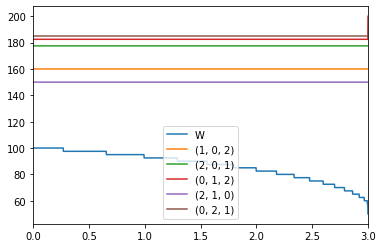

In [33]:
solucao[1].plot()

In [34]:
solucao[5].shape

(1730, 81)

In [35]:
ima=solucao[5]

In [36]:
ima

array([['W', 'W', 'W', ..., (0, 1, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (0, 1, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (0, 1, 2), (0, 1, 2), (0, 1, 2)],
       ...,
       ['W', 'W', 'W', ..., (0, 1, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (0, 1, 2), (0, 1, 2), (0, 1, 2)],
       ['W', 'W', 'W', ..., (0, 1, 2), (0, 1, 2), (0, 2, 1)]],
      dtype=object)

In [37]:
ima[1000,80]==(0,1,2)

True

In [38]:
solucao[4]

array([[0.00000000e+00, 1.36861850e-05, 1.06355435e-03, ...,
        7.10400000e+03, 7.22712500e+03, 7.22712500e+03],
       [0.00000000e+00, 1.36134537e-05, 1.05873813e-03, ...,
        7.10400000e+03, 7.22712500e+03, 7.22712500e+03],
       [0.00000000e+00, 1.35410498e-05, 1.05393958e-03, ...,
        7.10400000e+03, 7.22712500e+03, 7.22712500e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.10400000e+03, 7.22712500e+03, 7.22712500e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.10400000e+03, 7.22712500e+03, 7.22712500e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.10400000e+03, 7.22712500e+03, 7.35025000e+03]])

In [39]:
ima.shape

(1730, 81)

In [41]:
w, h = ima.shape[0], ima.shape[1]
data = np.zeros((h,w, 3), dtype=np.uint8)
d1=np.zeros((h,w))
for i in range(ima.shape[0]):
    for j in range(ima.shape[1]):
        #print(j)
        if ima[i,j]=='W':
            data[ima.shape[1]-j-1,i]=[0,0,0]
            d1[ima.shape[1]-j-1,i]=0
        elif ima[i,j]==(0,1,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=1
        elif ima[i,j]==(0,2,1):
            data[ima.shape[1]-j-1,i]=[255,100,0]
            d1[ima.shape[1]-j-1,i]=2
        elif ima[i,j]==(1,0,2):
            data[ima.shape[1]-j-1,i]=[255,0,0]
            d1[ima.shape[1]-j-1,i]=3
        elif ima[i,j]==(1,2,0):
            data[ima.shape[1]-j-1,i]=[255,255,0]
            d1[ima.shape[1]-j-1,i]=4
        elif ima[i,j]==(2,1,0):
            data[ima.shape[1]-j-1,i]=[0,0,255]
            d1[ima.shape[1]-j-1,i]=5
        elif ima[i,j]==(2,0,1):
            data[ima.shape[1]-j-1,i]=[100,0,255]
            d1[ima.shape[1]-j-1,i]=6
        
        

In [63]:
d1frame=pd.DataFrame(d1)
d1frame.columns=solucao[2]
d1frame.index=solucao[3][::-1]

In [73]:
d1frame.head()

,0.000000,0.001735,0.003470,0.005205,0.006940,0.008676,0.010411,0.012146,0.013881,0.015616,...,2.984384,2.986119,2.987854,2.989589,2.991324,2.993060,2.994795,2.996530,2.998265,3.000000
200.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
197.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
195.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
192.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
190.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


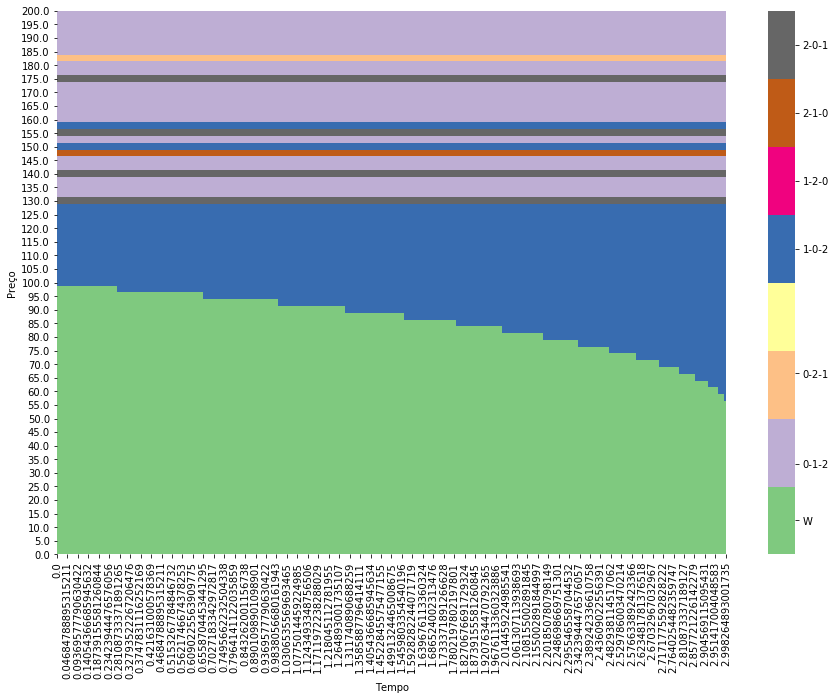

In [239]:

fig, ax=plt.subplots(figsize=(15,10))
#cbar_ax=fig.add_axes([0,1,2,3,4,5,6])
ax=sns.heatmap(d1frame, cmap="Accent")
#ax.locator_params(axis='x', nbins=4)
#ax.locator_params(axis='y',nbins=4)


colorbar = ax.collections[0].colorbar
colorbar.set_ticks([3/8,1,2,4*3/4 +3/8,5*3/4 +3/8,6*3/4 +3/8,6 - 3/8])
colorbar.set_ticklabels(['W', '0-1-2', '0-2-1','1-0-2','1-2-0','2-1-0','2-0-1'])

# X - Y axis labels
ax.set_ylabel('Preço');
ax.set_xlabel('Tempo');

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks();
plt.setp(labels, rotation=0);

#ax.set(xticklabels=solucao[2]);



In [ ]:
######################################
###########Bloco b1#####################

In [112]:
case_corr_b1

,Payara,Pluma
Type,,
Payara,1.0,0.6
Pluma,0.6,1.0


In [130]:
start=time.time()
accur=0.02
solucao_b1=diffinexpcart(case_b1,case_corr_b1,50,r,delta,sigma,tau,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 39.32236458063126


In [131]:
solucao_b1[0]

299.22191562710304

In [132]:
solucao_b1[1]

,W,"(0, 1)","(1, 0)"
0.000000,103.0,189.0,190.0
0.000278,103.0,189.0,190.0
0.000556,103.0,189.0,190.0
0.000833,103.0,189.0,190.0
0.001111,103.0,189.0,190.0
...,...,...,...
2.998889,65.0,189.0,190.0
2.999167,65.0,189.0,190.0
2.999444,65.0,189.0,190.0
2.999722,65.0,189.0,190.0


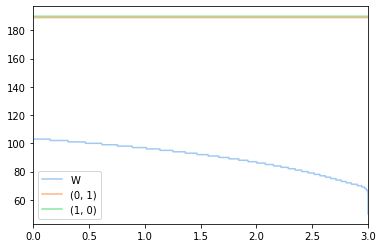

In [133]:
solucao_b1[1].plot()

In [134]:
ima=solucao_b1[5]

In [176]:
w, h = ima.shape[0], ima.shape[1]
#data = np.zeros((h,w, 3), dtype=np.uint8)
d2=np.zeros((h,w))
for i in range(ima.shape[0]):
    for j in range(ima.shape[1]):
        #print(j)
        if ima[i,j]=='W':
            #data[ima.shape[1]-j-1,i]=[0,0,0]
            d2[ima.shape[1]-j-1,i]=0
        elif ima[i,j]==(0,1):
            #data[ima.shape[1]-j-1,i]=[255,0,0]
            d2[ima.shape[1]-j-1,i]=2
        elif ima[i,j]==(1,0):
            #data[ima.shape[1]-j-1,i]=[255,100,0]
            d2[ima.shape[1]-j-1,i]=8
        

In [177]:
d2frame=pd.DataFrame(d2)
d2frame.columns=solucao_b1[2]
d2frame.index=solucao_b1[3][::-1]

In [178]:
d2frame

,0.000000,0.000278,0.000556,0.000833,0.001111,0.001389,0.001667,0.001944,0.002222,0.002500,...,2.997500,2.997778,2.998056,2.998333,2.998611,2.998889,2.999167,2.999444,2.999722,3.000000
200.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
199.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
198.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
197.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
196.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


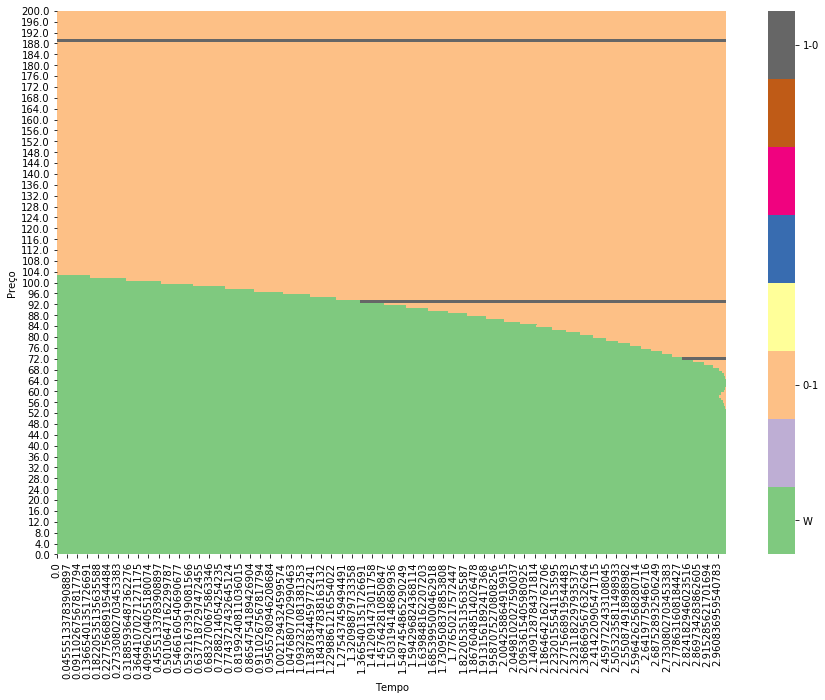

In [182]:
fig, ax=plt.subplots(figsize=(15,10))
#cbar_ax=fig.add_axes([0,1,2,3,4,5,6])
#cmap=sns.set_palette("hls",3)
ax=sns.heatmap(d2frame, cmap='Accent', vmax=8, vmin=0)
#ax=sns.set_palette("hls",3)

#ax.locator_params(axis='x', nbins=4)
#ax.locator_params(axis='y',nbins=4)


colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.5, 2.5,7.5])
colorbar.set_ticklabels(['W', '0-1', '1-0'])

# X - Y axis labels
ax.set_ylabel('Preço');
ax.set_xlabel('Tempo');

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks();
plt.setp(labels, rotation=0);

#ax.set(xticklabels=solucao[2]);



In [139]:
for i in range(200):
    print(i, carteira(case_b1,case_corr_b1,i)[0],carteira(case_b1,case_corr_b1,i)[1],carteira(case_b1,case_corr_b1,i)[3],carteira(case_b1,case_corr_b1,i)[2], carteira(case_b1,case_corr_b1,i)[4])

0 W 0.0 0.0 W 0.0
1 W 0.0 0.0 W 0.0
2 W 0.0 0.0 W 0.0
3 W 0.0 0.0 W 0.0
4 W 0.0 0.0 W 0.0
5 W 0.0 0.0 W 0.0
6 W 0.0 0.0 W 0.0
7 W 0.0 0.0 W 0.0
8 W 0.0 0.0 W 0.0
9 W 0.0 0.0 W 0.0
10 W 0.0 0.0 W 0.0
11 W 0.0 0.0 W 0.0
12 W 0.0 0.0 W 0.0
13 W 0.0 0.0 W 0.0
14 W 0.0 0.0 W 0.0
15 W 0.0 0.0 W 0.0
16 W 0.0 0.0 W 0.0
17 W 0.0 0.0 W 0.0
18 W 0.0 0.0 W 0.0
19 W 0.0 0.0 W 0.0
20 W 0.0 0.0 W 0.0
21 W 0.0 0.0 W 0.0
22 W 0.0 0.0 W 0.0
23 W 0.0 0.0 W 0.0
24 W 0.0 0.0 W 0.0
25 W 0.0 0.0 W 0.0
26 W 0.0 0.0 W 0.0
27 W 0.0 0.0 W 0.0
28 W 0.0 0.0 W 0.0
29 W 0.0 0.0 W 0.0
30 W 0.0 0.0 W 0.0
31 W 0.0 0.0 W 0.0
32 W 0.0 0.0 W 0.0
33 W 0.0 0.0 W 0.0
34 W 0.0 0.0 W 0.0
35 W 0.0 0.0 W 0.0
36 W 0.0 0.0 W 0.0
37 W 0.0 0.0 W 0.0
38 W 0.0 0.0 W 0.0
39 W 0.0 0.0 W 0.0
40 W 0.0 0.0 W 0.0
41 W 0.0 0.0 W 0.0
42 W 0.0 0.0 W 0.0
43 W 0.0 0.0 W 0.0
44 W 0.0 0.0 W 0.0
45 W 0.0 0.0 W 0.0
46 W 0.0 0.0 W 0.0
47 W 0.0 0.0 W 0.0
48 W 0.0 0.0 W 0.0
49 W 0.0 0.0 W 0.0
50 (0, 1) 15.25 0.0 W 15.25
51 (0, 1) 35.49999999999986 11.2

181 (0, 1) 4444.5 4444.5 (1, 0) 0.0
182 (0, 1) 4478.75 4478.75 (1, 0) 0.0
183 (0, 1) 4513.0 4513.0 (1, 0) 0.0
184 (0, 1) 4547.249999999999 4547.249999999999 (1, 0) 0.0
185 (0, 1) 4581.5 4581.5 (1, 0) 0.0
186 (0, 1) 4615.75 4615.75 (1, 0) 0.0
187 (0, 1) 4650.000000000001 4650.0 (1, 0) 9.094947017729282e-13
188 (0, 1) 4684.250000000001 4684.25 (1, 0) 9.094947017729282e-13
189 (1, 0) 4718.5 4718.499999999999 (0, 1) 9.094947017729282e-13
190 (0, 1) 4752.75 4752.75 (1, 0) 0.0
191 (0, 1) 4787.0 4787.0 (1, 0) 0.0
192 (0, 1) 4821.25 4821.25 (1, 0) 0.0
193 (0, 1) 4855.500000000001 4855.5 (1, 0) 9.094947017729282e-13
194 (0, 1) 4889.75 4889.75 (1, 0) 0.0
195 (0, 1) 4924.0 4924.0 (1, 0) 0.0
196 (0, 1) 4958.250000000001 4958.249999999999 (1, 0) 1.8189894035458565e-12
197 (0, 1) 4992.499999999999 4992.499999999999 (1, 0) 0.0
198 (0, 1) 5026.75 5026.75 (1, 0) 0.0
199 (0, 1) 5061.000000000001 5060.999999999999 (1, 0) 1.8189894035458565e-12


In [ ]:
#################################
#######Individuais  e B2############

In [287]:
################################################33
###########Modelo de Competicao#################


In [466]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_Guy.csv", sep=';')
case.set_index('Type', inplace=True)
case.Owner=case.Owner.astype(int)
case=case.astype(float).T
case

Type,Payara,Pluma,LongTail
CF,0.30,0.25,0.20
I_w,80.00,60.00,80.00
q,0.15,0.14,0.15
B,450.00,400.00,500.00
Owner,1.00,1.00,0.00


In [467]:
#Importar correlacao Case 2 ou ABC ou ABCD como case
case_corr=pd.read_csv("Case_Guy_corr.csv", sep=';')
case_corr.set_index('Type', inplace=True)
case_corr


,Payara,Pluma,LongTail
Type,,,
Payara,1.0,0.6,0.5
Pluma,0.6,1.0,0.6
LongTail,0.5,0.6,1.0


In [ ]:
#############################################

In [465]:
#################Formalizacao caso - com competição   

####Separação do ativo do vizinho -Caso bem particular onde há um só ativo e 
sinal=1  #sinal up igual a 1 e sinal down igual a 0
stra_rho=[]
stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[0,0])
stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[1,0])

FC_viz=case[case.columns[case.loc['Owner']==0]].iloc[0,0]

case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]])
case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]],axis=1)


case=case.drop(case[case.columns[case.loc['Owner']==0]],axis=1)




                         
                         
fold=[]
seq=[]
P=50
n=case.shape[1]
perm=itertools.permutations(range(n))
for k in list(perm):
    seq.append(k)
    #print(k)
    m=np.zeros((2**(n-1),n))
    p=np.zeros((2**(n-1),n))
    pi=np.zeros((2**(n-1),n))
    m[m==0]=np.nan
    p[m==0]=np.nan
    pi[pi==0]=np.nan
    
                         
    #m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
    #pi[0,0]=m[0,0]*(V(P,case,0) - I(P,case,0)) -case.iloc[1,k[0]]
    
    if sinal==1:
        
        m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(1,m[0,0],pi[0,0])
    
    elif sinal==0:
        print(0)
        m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(0,m[0,0],pi[0,0])
                         
    else:
        print(2)
        m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
        pi[0,0]=m[0,0]*(V(P,case,0) - I(case,0)) -case.iloc[1,k[0]]
        #print(2,m[0,0],pi[0,0])
        
    
    
                         
                         
    #Vetores Auxiliares
    Ax_m=[]
    Ax1_m=[]
    Ax_pi=[]
    Ax_lim=[]
    ##Loop para criacao da matriz de FC e VME
    for y in range(1,n,1):
        Ax_m.append(case.iloc[0,k[y]])
    
    
    for j in range(n-1):
        p=0
        for q in range(1+j,n,1):
            for i in range(2**(j)):
                p=p+1
                #print(p-1,j,q,i,j)
                CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                Ax1_m.append(CF_s)
                CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                Ax1_m.append(CF_ins)
                
                Ax_pi.append(CF_s*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                Ax_pi.append(CF_ins*(V(P,case,j+1) - I(case,j+1)) -case.iloc[1,k[j+1]])
                
                a=np.minimum(Ax_m[p-1],m[i,j])*(1-np.maximum(Ax_m[p-1],m[i,j]))
                b=np.maximum(Ax_m[p-1],m[i,j])*(1-np.minimum(Ax_m[p-1],m[i,j]))
                Ax_lim.append(np.sqrt(a/b)>case_corr.iloc[k[j],k[q]])
                
                a=-np.sqrt(Ax_m[p-1]*m[i,j]/(1-Ax_m[p-1])*(1-m[i,j]))
                b=-np.sqrt((1-Ax_m[p-1])*(1-m[i,j])/Ax_m[p-1]*m[i,j])
                Ax_lim.append(np.maximum(a,b)<case_corr.iloc[k[j],k[q]])
                

        m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
        pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]
        
        del Ax1_m[0:2*(i+1)]
        
        #print(Ax_lim)
        Ax_m=Ax1_m
        Ax1_m=[]
        Ax_pi=[]
        Ax_lim=[]
    
   # print(100*m)
    #print(pi)
    
    for l in np.arange(n-2,-1,-1):
        #print(l)
        for g in range(2**(l)):
            #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
            pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
    #print(pi)
    fold.append(pi[0,0])
    

###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
winner=np.amax(fold)
Seq_winner=seq[np.argmax(fold)]
winner=np.maximum(0,winner)
if winner==0:
    Seq_winner='W'

    
    
            

    #print(fold)
    #print(m)
print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
#print(fold)
    
    
    
    
    
    

melhor portfolio é: (0, 1) e o valor é: 160.74677831484792 [160.74677831484792, 0.0]


In [197]:
print('up: melhor portfolio é: (1, 0) e o valor é: 105.52316521446231 [92.60790195949767, 105.52316521446231]')

up: melhor portfolio é: (1, 0) e o valor é: 105.52316521446231 [92.60790195949767, 105.52316521446231]


In [202]:
print('down: melhor portfolio é: W e o valor é: 0.0 [0.0, 0.0]')

down: melhor portfolio é: W e o valor é: 0.0 [0.0, 0.0]


In [207]:
print('01: melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]')

01: melhor portfolio é: (1, 0) e o valor é: 7.343134832984433 [6.843134832984429, 7.343134832984433]


In [435]:
def carteira_estra(case,case_corr,P,sinal):
    #################Formalizacao caso 4 - correto
    
    sinal=1  #sinal up igual a 1 e sinal down igual a 0
    stra_rho=[]
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[0,0])
    stra_rho.append(case_corr[case.columns[case.loc['Owner']==0]].iloc[1,0])

    FC_viz=case[case.columns[case.loc['Owner']==0]].iloc[0,0]
    
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]])
    case_corr=case_corr.drop(case_corr[case.columns[case.loc['Owner']==0]],axis=1)


    case=case.drop(case[case.columns[case.loc['Owner']==0]],axis=1)

    
    
    
    fold=[]
    seq=[]
    #P=50
    n=case.shape[1]
    perm=itertools.permutations(range(n))
    for k in list(perm):
        seq.append(k)
        #print(k)
        m=np.zeros((2**(n-1),n))
        p=np.zeros((2**(n-1),n))
        pi=np.zeros((2**(n-1),n))
        m[m==0]=np.nan
        p[m==0]=np.nan
        pi[pi==0]=np.nan
        
        
        if sinal==1:
            m[0,0]=case.iloc[0,k[0]] + stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/FC_viz 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)) -case.iloc[1,k[0]]
        
        elif sinal==0:
            m[0,0]=case.iloc[0,k[0]] - stra_rho[k[0]]*np.sqrt(FC_viz*(1-FC_viz)*case.iloc[0,k[0]]*(1-case.iloc[0,k[0]]))/(1-FC_viz) 
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[3,k[0]]+650)) -case.iloc[1,k[0]]
        
        else:
            #print(2)
            m[0,0]=case.iloc[0,k[0]] ### Capta da permutacao, o fc da Primeira na ordem de perfuracao
            pi[0,0]=m[0,0]*(P*case.iloc[2,k[0]]*case.iloc[3,k[0]] - (5.35*case.iloc[5,k[0]]+650)) -case.iloc[1,k[0]]
        

        

        #Vetores Auxiliares
        Ax_m=[]
        Ax1_m=[]
        Ax_pi=[]
        ##Loop para criacao da matriz de FC e VME
        for y in range(1,n,1):
            Ax_m.append(case.iloc[0,k[y]])


        for j in range(n-1):
            p=0
            for q in range(1+j,n,1):
                for i in range(2**(j)):
                    p=p+1
                    #print(p-1,j,q,i,j)
                    CF_s=Ax_m[p-1] +case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/m[i,j]
                    Ax1_m.append(CF_s)
                    CF_ins=Ax_m[p-1] -case_corr.iloc[k[j],k[q]]*np.sqrt((m[i,j]-m[i,j]**2)*(Ax_m[p-1]-Ax_m[p-1]**2))/(1-m[i,j])
                    Ax1_m.append(CF_ins)

                    Ax_pi.append(CF_s*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)) -case.iloc[1,k[j+1]])
                    Ax_pi.append(CF_ins*(P*case.iloc[2,k[j+1]]*case.iloc[3,k[j+1]] - (5.35*case.iloc[3,k[j+1]]+650)) -case.iloc[1,k[j+1]])


            m[0:2*(i+1),j+1]=Ax1_m[0:2*(i+1)]
            pi[0:2*(i+1),j+1]=Ax_pi[0:2*(i+1)]

            del Ax1_m[0:2*(i+1)]

            Ax_m=Ax1_m
            Ax1_m=[]
            Ax_pi=[]

        #print(100*m)
        #print(pi)

        for l in np.arange(n-2,-1,-1):
            #print(l)
            for g in range(2**(l)):
                #print(pi[g,l],m[g,l], pi[2*g,l+1],(1-m[g,l]), pi[2*g+1,l+1]   )
                pi[g,l]= np.maximum(0,pi[g,l] + m[g,l]*np.maximum(0,pi[2*g,l+1]) + (1-m[g,l])*np.maximum(0,pi[2*g+1,l+1]))
        #print(pi)
        fold.append(pi[0,0])


    ###Fornece o melhor portfolio seq_winner e o valor do porfolio winner
    winner=np.amax(fold)
    Seq_winner=seq[np.argmax(fold)]
    winner=np.maximum(0,winner)
    if winner==0:
        Seq_winner='W'





        #print(fold)
        #print(m)
    #print('melhor portfolio é:',Seq_winner, 'e o valor é:', winner, fold)
    #print(fold)
    return[Seq_winner,winner,fold]







In [436]:
carteira_estra(case,case_corr,50,1)

[(0, 1), 160.74677831484792, [160.74677831484792, 0.0]]

In [285]:
diffinexpcart(case,case_corr,50,r,delta,sigma,tau)[0]

14.011472926007304

In [286]:
def diffinexpcartestra(case,case_corr,sinal,P,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=4*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1,M+1), dtype=object)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        solution=carteira_estra(case,case_ABC_corr,Pt[i],sinal)
        F[N,i]=solution[1]
        #print(solution[0])
        Gatilho[N,i]=solution[0]
        #F[N,i]=np.maximum(0,Pt[i]-I)
    #Gatilho[N]=I
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            #if F[j,i]< Vt[i]-I and F[j,i-1]>Pt[i-1]-I:
            #    Gatilho[j]=(Pt[i]+Vt[i-1])/2
            
            solution=carteira_estra(case,case_corr,Pt[i],sinal)
            if F[j,i]>=solution[1]: #opcao americana e gatilho
                Gatilho[j,i]='W'
            else:
                Gatilho[j,i]=solution[0]
                F[j,i]=solution[1]
        
        
        F[j,0]=0
        Gatilho[j,0]='W'
        solution=carteira_estra(case,case_corr,Pt[i],sinal)
        F[j,M]=solution[1]
        Gatilho[j,M]=solution[0]
        
    T=np.linspace(0,tau,num=N+1)
    
    ###############Dataframe do Gatilho##############
    #print(Gatilho.shape[0])
    dframe=pd.DataFrame(list(range(Gatilho.shape[0])))
    dframe.columns=['Time']
    dframe= dframe.set_index('Time')

    for i in range(Gatilho.shape[0]):
        check=Gatilho[i,0]
        for j in range(Gatilho.shape[1]):
            if check == Gatilho[i,j]:
                check=check
            else:
                #print(i,j,'{}'.format(check),Gatilho[i,j],j)
                dframe.loc[i,'{}'.format(Gatilho[i,j])]=Pt[j]
                check=Gatilho[i,j]
    dframe.index=T
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,PGrid],dframe,T,Pt,F]



In [321]:
def diffinexp(case,V,r,div,sigma,tau):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    accur=0.1  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaV=V*accur
    
    # M são as divisões do grid em V
    #forcei a barra- coloque 3 vezes a V de perpetuidade. Estava 1,1 
    Vmax=4*V
    M= int(Vmax/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    VGrid=int(V/deltaV) #Ponto do grid onde esta V_0. 
    deltat= (deltaV**2)/((sigma**2)*(Vmax**2)) #Convergência: Critério do peso central >=0. Vmax=3I ><1.1Gatilho_perp
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    #Vetor Vt
    Vt=np.zeros(M+1)
    Gatilho=np.zeros(N+1)
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Vt[i]= i*deltaV
        #F[N,i]=np.maximum(0,Vt[i]-I)
        F[N,i]=np.maximum(0,caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0])
    Gatilho[N]=caseR.iloc[0,0]*(Vt[i]/50)*case.iloc[5,0] + case.iloc[1,0]
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pd = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pd*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            if F[j,i]< caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0] and F[j,i-1]>caseR.iloc[0,0]*(Vt[i-1]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i-1]/50)*case.iloc[5,0]) -case.iloc[1,0]:
                Gatilho[j]=(Vt[i]+Vt[i-1])/2
            
            F[j,i]=np.maximum(caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0], F[j,i])  #opção americana
        
        
        F[j,0]=0
        F[j,M]=caseR.iloc[0,0]*(Vt[i]*case.iloc[3,0]*case.iloc[4,0] - (Vt[i]/50)*case.iloc[5,0]) -case.iloc[1,0]
        
        
    T=np.linspace(0,tau,num=len(Gatilho))
    
    ###Retorna A opção hoje, Gatilho, Tempo, Vt, Matrix para Gráficos
    return[F[0,VGrid],Gatilho,T,Vt,F]



In [301]:
start=time.time()

r2=diffinexpcartestra(case,case_corr,2,50,r,delta,sigma,tau)
print(r2[0])

14.011472926007304


In [302]:
r1=diffinexpcartestra(case,case_corr,1,50,r,delta,sigma,tau)

In [303]:
r0=diffinexpcartestra(case,case_corr,0,50,r,delta,sigma,tau)

In [304]:
FC_viz*r1[0] + (1-FC_viz)*r0[0]

23.248679387511107

In [305]:
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 34.52971352338791


In [330]:
start=time.time()
rabc=diffinexpcart(case_ABC,case_ABC_corr,50,r,delta,sigma,tau)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 7.226902592182159


In [325]:
caseR=case[case.columns[case.loc['Owner']==0]]
caseR

Type,R
CF,0.20
I_w,50.00
P,50.00
q,0.12
B,700.00
I_d,4000.00
Owner,0.00


In [320]:


print('VME-R',caseR.iloc[0,0]*(caseR.iloc[2,0]*caseR.iloc[3,0]*caseR.iloc[4,0] - (caseR.iloc[2,0]/50)*caseR.iloc[5,0]) -caseR.iloc[1,0])


VME-R -10.0


In [323]:
rr=diffinexp(caseR,50,r,delta,sigma,tau)

In [336]:
####
print('Portfolio sem considerar o vizinho:', r2[0])
print('Portfolio considerando o vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0])
print('Diferença - Valor adicionado pela informação do vizinho:',FC_viz*r1[0] + (1-FC_viz)*r0[0] - r2[0] )
print('Portfolio do vizinho:', rr[0])
print('Portfolio incorporando o ativo do vizinho:',rabc[0])
print('Diferença - Incorporar ou não o ativo do vizinho:',rabc[0]-FC_viz*r1[0] - (1-FC_viz)*r0[0])

Portfolio sem considerar o vizinho: 14.011472926007304
Portfolio considerando o vizinho: 23.248679387511107
Diferença - Valor adicionado pela informação do vizinho: 9.237206461503803
Portfolio do vizinho: 1.9112132260213393
Portfolio incorporando o ativo do vizinho: 27.68702560763952
Diferença - Incorporar ou não o ativo do vizinho: 4.4383462201284125
